In [ ]:
pip install matplotlib


In [28]:
import pandas as pd

# Load the Updated_Call_log.csv file
call_log_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Updated_Call_log.csv')

# Display the first few rows of the dataframe
call_log_df.head()


,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion
0,32320,2017-01-01 00:00:00,1683,320,14,Resolution1,Type10,Plan3,anger
1,32240,2017-01-01 00:00:00,836,184,16,Resolution1,Type30,Plan1,neutral
2,32410,2017-01-01 00:00:00,2098,558,10,Resolution2,Type40,Plan3,anger
3,26210,2017-01-01 00:00:00,1027,290,2,Resolution2,Type50,Plan5,neutral
4,32320,2017-01-01 00:00:00,1283,499,8,Resolution1,Type20,Plan8,neutral


In [22]:
# Load the User_experience.csv file
user_experience_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/User_experience.csv')

# Display the first few rows of the user experience dataframe
user_experience_df.head()


,Agent_ID,Call_Date,User_Experience
0,32430,2017-01-25 00:00:00,very good
1,26020,2017-01-26 00:00:00,very good
2,26010,2017-01-27 00:00:00,very good
3,26020,2017-01-27 00:00:00,very good
4,32040,2017-01-27 00:00:00,very good


In [23]:
# Merge the two dataframes on 'Agent_ID' and 'Call_Date'
merged_df = pd.merge(call_log_df, user_experience_df, on=['Agent_ID', 'Call_Date'], how='inner')

# Display the first few rows of the merged dataframe
merged_df.head()
# merged_df.info()
# merged_df.value_counts()

,Agent_ID,Call_Date,Talk_Time,After_Call_Work_Time,Queue_Time,Call_resolution_ID,Call_Type_ID,Plan_ID,Emotion,User_Experience
0,32430,2017-01-25 00:00:00,1990,629,18,Resolution1,Type20,Plan3,neutral,very good
1,32430,2017-01-25 00:00:00,2586,530,12,Resolution1,Type40,Plan1,anger,very good
2,32430,2017-01-25 00:00:00,1388,264,7,Resolution1,Type40,Plan6,neutral,very good
3,32430,2017-01-25 00:00:00,1024,272,13,Resolution2,Type10,Plan5,anger,very good
4,32430,2017-01-25 00:00:00,1496,306,9,Resolution1,Type30,Plan6,sadness,very good


In [24]:
# Generate a cross-tabulation between 'Emotion' and 'User_Experience'
emotion_experience_ct = pd.crosstab(merged_df['Emotion'], merged_df['User_Experience'])

emotion_experience_ct


User_Experience,excellent,good,very good
Emotion,,,
anger,333,302,2049
fear,62,61,351
happiness,63,68,438
neutral,599,586,3870
sadness,40,45,383


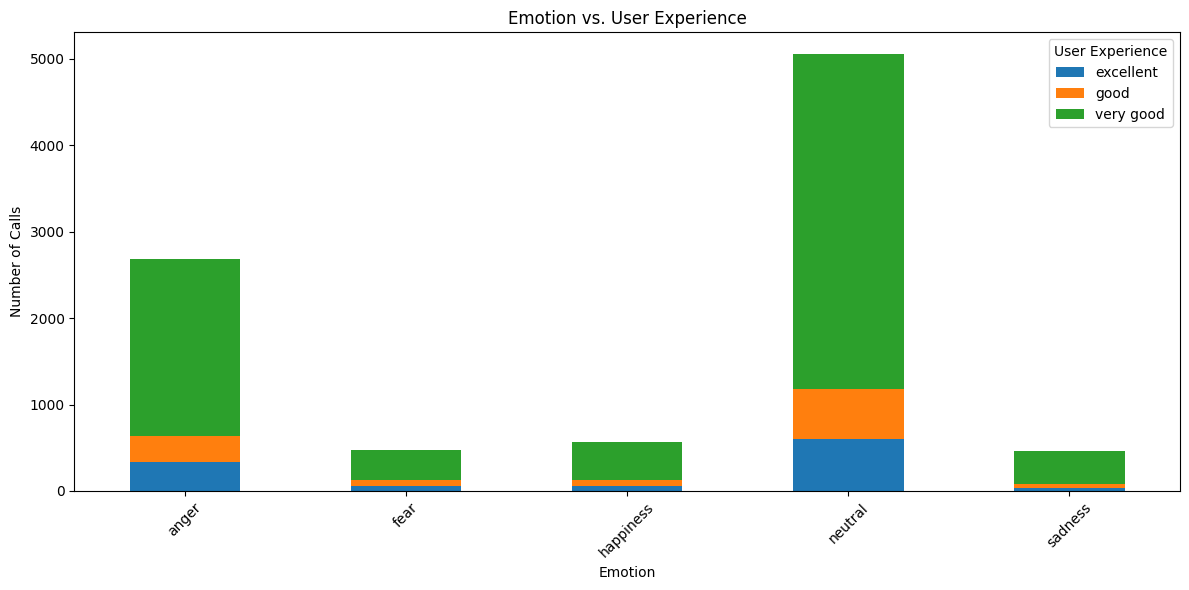

In [30]:
import matplotlib.pyplot as plt

# Plot the cross-tabulation
emotion_experience_ct.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Emotion vs. User Experience')
plt.ylabel('Number of Calls')
plt.xlabel('Emotion')
plt.xticks(rotation=45)
plt.legend(title='User Experience')
plt.tight_layout()

plt.show()


In [33]:
# Load the Call_Resolution_Type.csv file
resolution_type_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Resolution_Type.csv')

# Display the first few rows of the resolution type dataframe
resolution_type_df.head()


,Call_resolution_ID,Call_resolution_Description
0,Resolution1,Call resolved by agent
1,Resolution2,Transferred to other agent
2,Resolution3,Escalated to Supervisor
3,Resolution4,NaN
4,Resolution5,NaN


In [34]:
# Merge the merged_df with resolution_type_df on 'Call_resolution_ID'
merged_resolution_df = pd.merge(merged_df, resolution_type_df, on='Call_resolution_ID', how='left')

# Generate a cross-tabulation between 'Call_resolution_Description' and 'Emotion'
resolution_emotion_ct = pd.crosstab(merged_resolution_df['Call_resolution_Description'], merged_resolution_df['Emotion'])

resolution_emotion_ct


Emotion,anger,fear,happiness,neutral,sadness
Call_resolution_Description,,,,,
Call resolved by agent,2007,365,415,3824,349
Escalated to Supervisor,267,47,64,531,53
Transferred to other agent,410,62,90,700,66


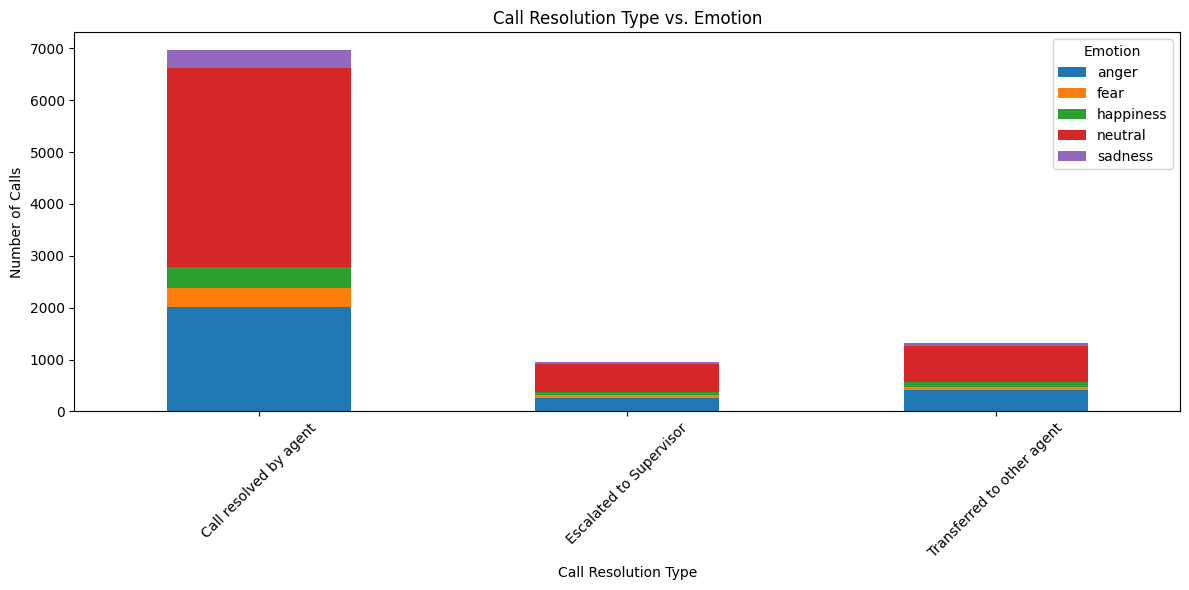

In [35]:
# Plot the cross-tabulation between resolution type and emotion
resolution_emotion_ct.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Call Resolution Type vs. Emotion')
plt.ylabel('Number of Calls')
plt.xlabel('Call Resolution Type')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.tight_layout()

plt.show()
